In [2]:
import snntorch as snn
from snntorch.functional import probe

import torch
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 4)
        self.lif1= snn.Leaky(0.2, init_hidden=True)
        self.fc2 = nn.Linear(4, 2)
        self.lif2 = snn.Leaky(0.1,)

    
    def forward(self, x_seq: torch.Tensor):
        spk_rec = []
        for i in range(x_seq.size(0)):
            x = self.fc1(x_seq[i])
            x = self.lif1(x)
            x = self.fc2(x)
            x, _  = self.lif2(x)
            spk_rec.append(x)
        return torch.stack(spk_rec)

net = Net()
print(f"self.lif1={type(snn.Leaky(0.2))}")
mtor = probe.OutputMonitor(net, instance=snn.Leaky)
mtor.enable()
with torch.no_grad():
    # (0 - 10) * torch.rand([40, 128, 8]) + 10
    y = net((0 - 20) * torch.rand([40, 128, 8]) + 20)
    #print(f'mtor.records={mtor.records}')
    print(f'mtor.monitored_layers={mtor.monitored_layers}')
    print(f"mtor['lif1']={mtor['lif1']}")
    print(f"len of mtor[lif1]={len(mtor['lif1'])}")
    print(f"shape of mtor[lif1]={mtor['lif1'][0].shape}")
    print(f"mtor['lif2']={mtor['lif2']}")
    print(f"len of mtor[lif2]={len(mtor['lif2'])}")
    print(f"shape of mtor[lif2][0][0]={mtor['lif2'][0][0].shape}")
    print(f"shape of mtor[lif2][0][1]={mtor['lif2'][0][1].shape}")

self.lif1=<class 'snntorch._neurons.leaky.Leaky'>
mtor.monitored_layers=['lif1', 'lif2']
mtor['lif1']=[tensor([[1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 0., 0.],
        [0., 0., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 1., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 1., 1., 0.],
        [0., 1., 1., 0.],
        [1., 1., 0., 0.],
        [0., 1., 1., 0.],
        [1., 1., 1., 0.],
        [0., 1., 1., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 

In [6]:
for name in mtor.monitored_layers:
    print(f"for layer {name}")
    #print(f"mtor[name]={mtor[name]}")
    print(f"len of mtor[name]={len(mtor[name])}")
    if isinstance(mtor[name][0], tuple):
        print(f"mtor[name][0]  is tuple")
        for i in range(len(mtor[name][0])):
            print(f"shape of mtor[name][0][{i}]={mtor[name][0][i].shape}")
    elif isinstance(mtor[name][0], torch.Tensor):
        print(f"mtor[name][0] is tensor")
        print(f"shape of mtor[name]0] ={mtor[name][0].shape}")

for layer lif1
len of mtor[name]=40
mtor[name][0] is tensor
shape of mtor[name]0] =torch.Size([128, 4])
for layer lif2
len of mtor[name]=40
mtor[name][0]  is tuple
shape of mtor[name][0][0]=torch.Size([128, 2])
shape of mtor[name][0][1]=torch.Size([128, 2])


In [3]:
for name in mtor.monitored_layers:
    print(f"for layer {name}")
    #print(f"mtor[name]={mtor[name]}")
    print(f"len of mtor[name]={len(mtor[name])}")
    if isinstance(mtor[name][0], tuple):
        print(f"mtor[name][0] is tuple")
        new_spike_tensor = torch.stack([t[0] for t in mtor[name]])
        new_membrane_tensor = torch.stack([t[1] for t in mtor[name]])
        print(f"shape of new_spike_tensor={new_spike_tensor.shape}")
        print(f"shape of new_membrane_tensor={new_membrane_tensor.shape}")
    elif isinstance(mtor[name][0], torch.Tensor):
        print(f"mtor[name][0] is tensor")
        new_tensor = torch.stack(mtor[name])
        print(f"shape of new_tensor={new_tensor.shape}")

for layer lif1
len of mtor[name]=40
mtor[name][0] is tensor
shape of new_tensor=torch.Size([40, 128, 4])
for layer lif2
len of mtor[name]=40
mtor[name][0] is tuple
shape of new_spike_tensor=torch.Size([40, 128, 2])
shape of new_membrane_tensor=torch.Size([40, 128, 2])


torch.Size([40, 4])
tensor([[1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 1., 1., 0.],
        [0., 1., 1., 0.],
        [1., 1., 1., 0.],
        [0., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [0., 1., 1., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 1., 1., 0.],
        [1., 1., 1., 1.],
        [0., 0., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1

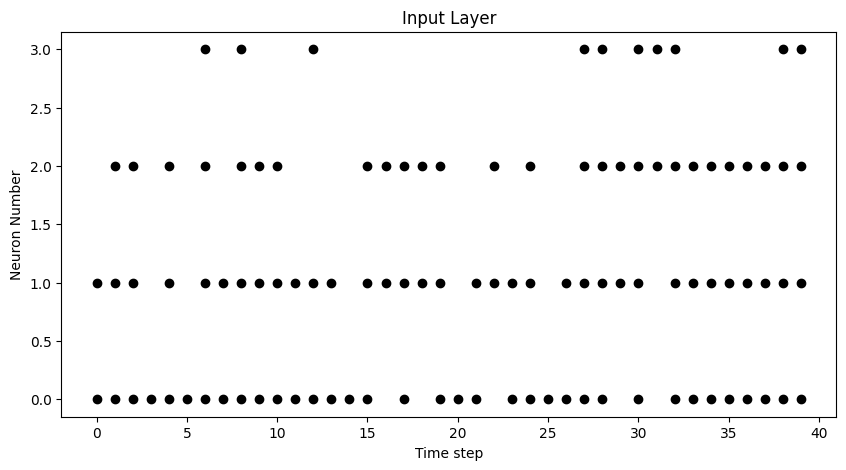

In [4]:
import snntorch.spikeplot as splt
import matplotlib.pyplot as plt
import numpy as np

def create_raster_plot(data, figsize):
    plt.clf()
    plt.figure(figsize=figsize)
    print(data.shape)
    for channel in range(data.shape[0]):
        spike_times = np.where(data[channel])[0]
        plt.vlines(spike_times, channel + 0.5, channel + 1.5)

    plt.yticks(np.arange(0, data.shape[0] + 1), [f'N {i}' for i in range(0, data.shape[0]+1)])
    plt.xlabel('Time (ms)')
    plt.ylabel('Channels')
    plt.title('Raster Plot of Spiking Events')
    plt.ylim(0, data.shape[0])
    plt.xlim(0, data.shape[1])
    plt.xticks(ticks=np.arange(data.shape[1]), labels=np.arange(data.shape[1]))
    plt.grid(axis='x', color='black', linestyle='--', linewidth=0.2)
    plt.show()


# Generate the raster plot

def plot_signals(matrix, figsize):
    """
    Plots the signal for each channel in the provided matrix.
    
    Parameters:
    matrix (np.ndarray): A 2D array where the first dimension represents channels
                         and the second dimension represents timesteps.
    """
    channels, timesteps = matrix.shape
    
    plt.figure(figsize=figsize)
    for i in range(channels):
        plt.plot(matrix[i], label=f'Channel {i+1}')
    plt.xlabel('Timestep')
    plt.ylabel('Signal Value')
    plt.xlim(0, matrix.shape[1])
    plt.xticks(ticks=np.arange(matrix.shape[1]), labels=np.arange(matrix.shape[1]))
    plt.grid(axis='x', color='black', linestyle='--', linewidth=0.2)
    plt.legend()
    plt.show()



tensor([[1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 1., 1., 0.],
        [0., 1., 1., 0.],
        [1., 1., 1., 0.],
        [0., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [0., 1., 1., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 1., 1., 0.],
        [1., 1., 1., 1.],
        [0., 0., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1.,

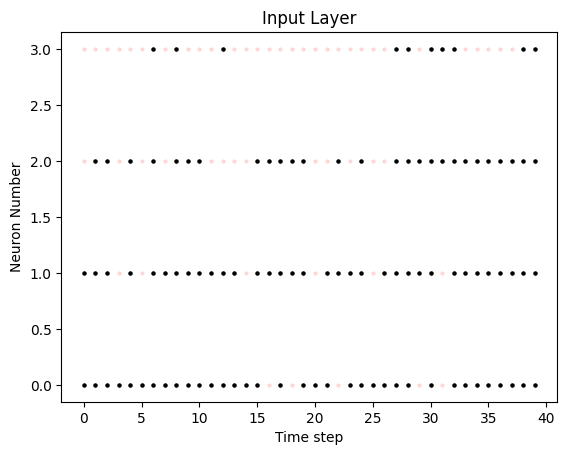

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_tensor is defined somewhere above this code
# For demonstration, let's create a dummy 3D tensor
# new_tensor = np.random.randint(0, 2, (100, 1, 10))  # Example tensor
print(f"{new_tensor[:,0,:]}")
fig, ax = plt.subplots()

# Assuming this is your way to plot a raster plot, replace with actual plotting code if different
# For demonstration, let's plot random points
# Mark zeros
for t in range(new_tensor.shape[0]):  # For each time step
    for n in range(new_tensor.shape[2]):  # For each neuron
        if new_tensor[t, 0, n] == 0:  # If the value is zero
            ax.scatter(t, n, s=5, c="red", marker="o", alpha=0.1)  # Mark with a red circle
        if new_tensor[t, 0, n] == 1:
            ax.scatter(t, n, s=5, c="black", marker="o")
ax.set_title("Input Layer")
ax.set_xlabel("Time step")
ax.set_ylabel("Neuron Number")
plt.show()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


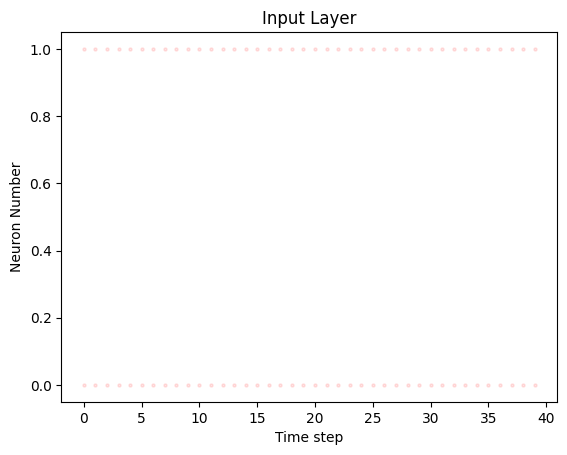

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_tensor is defined somewhere above this code
# For demonstration, let's create a dummy 3D tensor
# new_tensor = np.random.randint(0, 2, (100, 1, 10))  # Example tensor
print(f"{new_spike_tensor[:,0,:]}")
fig, ax = plt.subplots()

# Assuming this is your way to plot a raster plot, replace with actual plotting code if different
# For demonstration, let's plot random points
# Mark zeros
for t in range(new_spike_tensor.shape[0]):  # For each time step
    for n in range(new_spike_tensor.shape[2]):  # For each neuron
        if new_spike_tensor[t, 0, n] == 0:  # If the value is zero
            ax.scatter(t, n, s=5, c="red", marker="o", alpha=0.1)  # Mark with a red circle
        if new_spike_tensor[t, 0, n] == 1:
            ax.scatter(t, n, s=5, c="black", marker="o")
ax.set_title("Input Layer")
ax.set_xlabel("Time step")
ax.set_ylabel("Neuron Number")
plt.show()

torch.Size([40, 4])


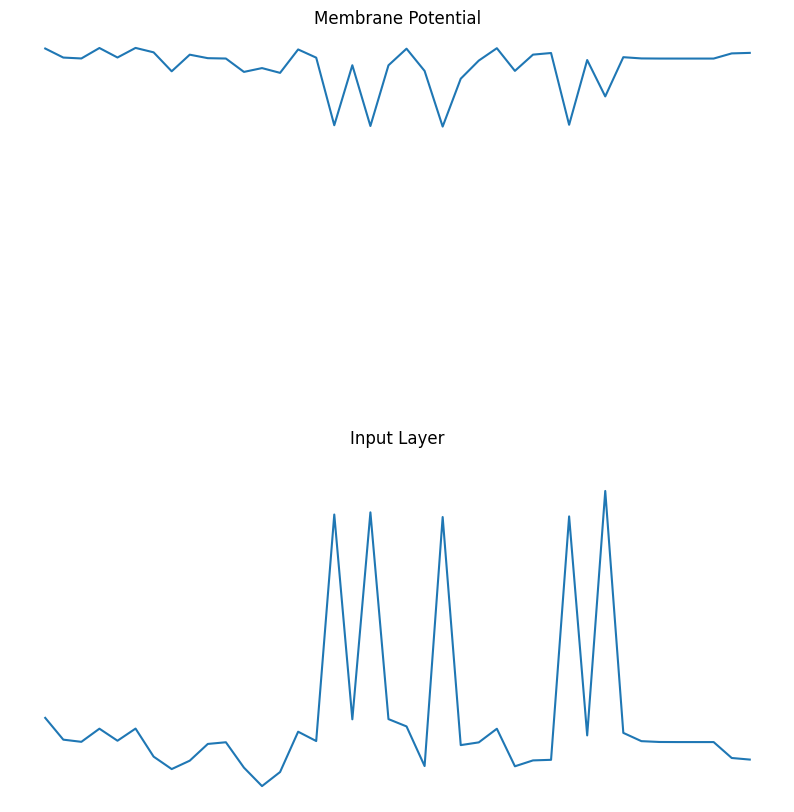

In [8]:
import snntorch.spikeplot as splt
import matplotlib.pyplot as plt
print(new_tensor[:,0,:].shape)
plt.figure(facecolor="w", figsize=(10, 10))
splt.traces(new_membrane_tensor[:,0,:],spk=new_spike_tensor[:,0,:], dim=(2,1), titles=["Membrane Potential", "Spike Train", "Spike Train", "Spike Train"])
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


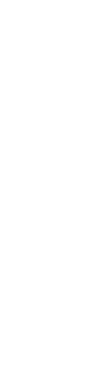

In [9]:
import IPython.display as display
fig, ax = plt.subplots()
anim = splt.animator(new_tensor[:,0,:].unsqueeze(dim=-1), fig, ax)
anim.save("spike_mnist.gif")
gif_td = lambda gif: f'<td> <img src="{gif}" alt="Drawing" style="height: 250px;"/> </td>'

html = '<table>'
html += '<tr><td align="center"><b>Input</b></td><td><b>Output</b></td></tr>'
html += '<tr>'
html += gif_td('fspike_mnist.gif')
html += '</tr>'
html += '</tr></table>'
display.HTML(html)

In [10]:
import snntorch as snn
from snntorch.functional import probe

import torch
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 4)
        self.lif1 = snn.Leaky(0.2)
        self.fc2 = nn.Linear(4, 2)
        self.lif2 = snn.Leaky(0.2)

    def forward(self, x_seq: torch.Tensor):
        x_seq = self.fc1(x_seq)
        x_seq, _  = self.lif1(x_seq)
        x_seq = self.fc2(x_seq)
        x_seq, _  = self.lif2(x_seq)
        return x_seq

net = Net()

monitor = probe.AttributeMonitor('spk', False, net,
instance=snn.Leaky)

with torch.no_grad():
    y = net(torch.rand([1, 8]))
    print(f'monitor.records={monitor.records}')
    print(f'monitor[0]={monitor[0]}')
    print(f'monitor.monitored_layers={monitor.monitored_layers}')
    print(f"monitor['lif1']={monitor['lif1']}")
    print(f"monitor['lif1']={monitor['lif2']}")

AttributeError: 'Leaky' object has no attribute 'spk'